Comparing new submission against 2 previous submissions:
Similarity with previous assignment 1: 0.7484
Plagiarism Detected with previous assignment 1!
Similarity with previous assignment 2: 0.8287
Plagiarism Detected with previous assignment 2!


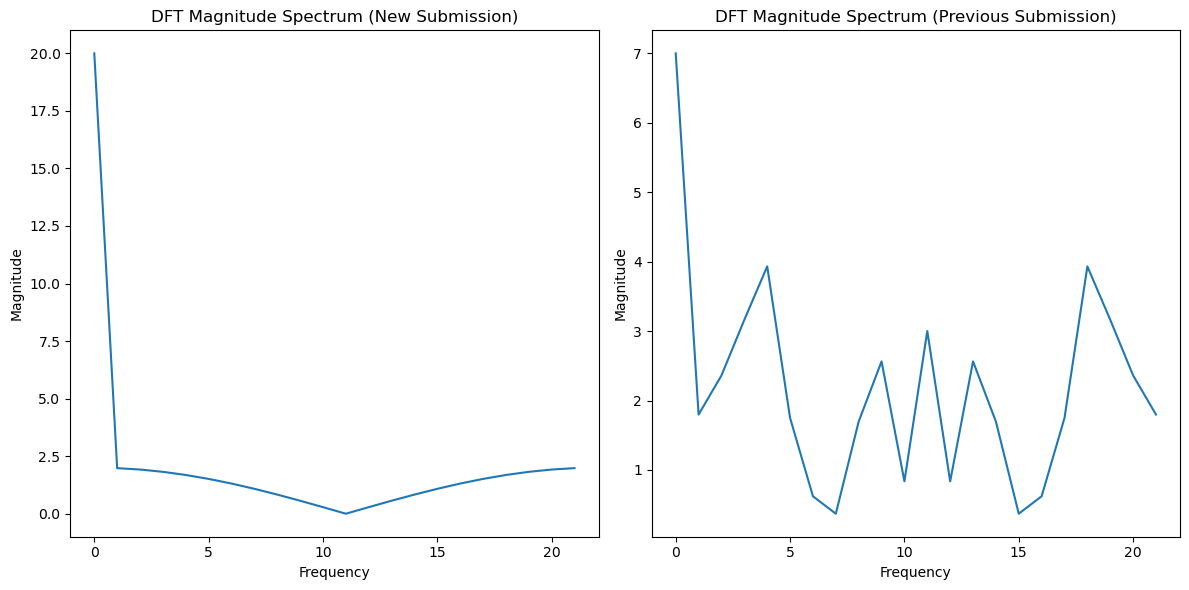

In [5]:
import numpy as np
import re
import math
import string
from collections import Counter
from scipy.fft import fft
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function to preprocess text (remove punctuation, stopwords, etc.)
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    return text

# Function to create a frequency vector (tokenize words)
def create_frequency_vector(text, vocabulary):
    words = text.split()
    word_counts = Counter(words)
    # Create a frequency vector of the same length as the vocabulary
    vector = np.zeros(len(vocabulary))
    for idx, word in enumerate(vocabulary):
        vector[idx] = word_counts.get(word, 0)  # Assign the count or 0 if the word is not present
    return vector

# Function to apply DFT (Discrete Fourier Transform) to the frequency vector
def apply_dft(frequency_vector):
    # Apply FFT (Fast Fourier Transform) to the frequency vector
    dft_result = fft(frequency_vector)
    return np.abs(dft_result)  # We take the absolute value of the DFT result

# Function to calculate cosine similarity between two DFT vectors
def calculate_cosine_similarity(dft_vector1, dft_vector2):
    # Cosine similarity is calculated as the dot product of two vectors
    # divided by the product of their magnitudes (norms)
    return cosine_similarity([dft_vector1], [dft_vector2])[0][0]

# Function to check for plagiarism (compare multiple assignments)
def check_plagiarism(assignment1, assignment2):
    # Preprocess both assignments
    assignment1 = preprocess_text(assignment1)
    assignment2 = preprocess_text(assignment2)

    # Create the vocabulary (union of all words in both assignments)
    all_words = set(assignment1.split()).union(set(assignment2.split()))
    vocabulary = list(all_words)

    # Convert assignments to frequency vectors with the same vocabulary
    freq_vector1 = create_frequency_vector(assignment1, vocabulary)
    freq_vector2 = create_frequency_vector(assignment2, vocabulary)

    # Apply DFT to the frequency vectors
    dft_vector1 = apply_dft(freq_vector1)
    dft_vector2 = apply_dft(freq_vector2)

    # Calculate cosine similarity between the two DFT vectors
    similarity = calculate_cosine_similarity(dft_vector1, dft_vector2)

    return similarity, dft_vector1, dft_vector2

# Sample text for assignment checking
assignment1_text = """
This is a sample text for plagiarism detection. It is a basic assignment that we are using for testing.
The purpose of this text is to demonstrate how to check for plagiarism using cosine similarity and DFT.
"""
assignment2_text = """
This is a sample text that we will use for testing plagiarism detection. It's a simple assignment with basic content.
The goal of this text is to show how cosine similarity and DFT are used to check for similarity between two assignments.
"""

# Store previous assignments in a list (for demo purposes)
previous_assignments = [
    "This is a first previous assignment text.",
    "Here's another previous assignment that is completely different."
]

# Function to compare new submission with all previous assignments
def compare_new_submission(new_submission, previous_assignments):
    print(f"Comparing new submission against {len(previous_assignments)} previous submissions:")
    for idx, previous_assignment in enumerate(previous_assignments):
        similarity_score, _, _ = check_plagiarism(new_submission, previous_assignment)
        print(f"Similarity with previous assignment {idx + 1}: {similarity_score:.4f}")
        threshold = 0.7  # You can adjust this threshold based on your requirements
        if similarity_score > threshold:
            print(f"Plagiarism Detected with previous assignment {idx + 1}!")
        else:
            print(f"No Plagiarism Detected with previous assignment {idx + 1}.")

# New assignment submission
new_submission = """
This is a new submission text that we will compare against previous ones. It contains some similarities with prior submissions.
"""

# Compare new submission with all previous assignments
compare_new_submission(new_submission, previous_assignments)

# Optionally, you can visualize the DFT results for comparison
# Let's visualize the DFT for the new submission and the first previous submission (just for demonstration)
similarity_score, dft_vector1, dft_vector2 = check_plagiarism(new_submission, previous_assignments[0])

# Plot the DFT magnitude spectrum for the new submission and the first previous submission
def plot_dft(dft_vector1, dft_vector2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(dft_vector1)
    plt.title("DFT Magnitude Spectrum (New Submission)")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")

    plt.subplot(1, 2, 2)
    plt.plot(dft_vector2)
    plt.title("DFT Magnitude Spectrum (Previous Submission)")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

# Visualize the DFT results for the new submission and the first previous assignment
plot_dft(dft_vector1,dft_vector2)

In [ ]:
import requests

# URL of your API endpoint
url = 'http://localhost:3000/assignments/texts'

# Make the GET request
response = requests.get(url)

# Convert to list of texts
if response.status_code == 200:
    data = response.json()
    texts = [item['text'] for item in data]
    print(texts)
else:
    print("Failed to fetch data:", response.status_code)
